## Word clouds

In [3]:
# !pip install wordcloud

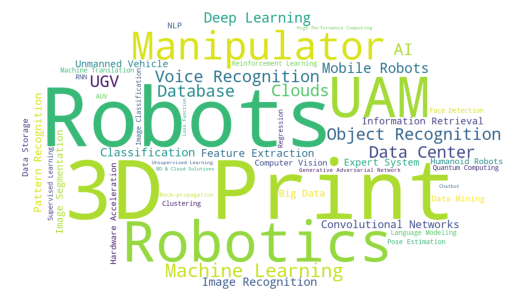

In [87]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd

data = pd.read_csv("data/counts/patents_count.csv")
dic = dict(zip(data.topic, data['count']))

mask = np.array(Image.open("data/mask.png"))
mask[mask == 1] = 255

wordcloud = WordCloud(background_color = "white", max_words = 50, mask = mask, repeat=True)
wordcloud = wordcloud.generate_from_frequencies(dic)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Industry**

In [92]:
def wc(data, filename):
    wordcloud = WordCloud(background_color = "white", max_words = 15, mask = mask, repeat=True).generate_from_frequencies(dic)
    wordcloud.to_file(f"data/plots/wordclouds/{filename}.png")

In [93]:
data = pd.read_csv("data/counts/patents_count.csv")

dic = dict(zip(data.topic, data['count']))
wc(dic, "wc_patents_count")

In [103]:
for y in pd.read_csv("data/patents_topics2.csv", usecols=['year']).year.unique():
    data = pd.read_csv(f"data/counts/patents_count_year_{y}.csv")
    dic = dict(zip(data.topic, data['count']))
    wc(dic, f"wc_patents_count_year_{y}")

**Science**

In [105]:
data = pd.read_csv("data/counts/papers_count.csv")

dic = dict(zip(data.topic, data['count']))
wc(dic, "wc_papers_count")

dic = dict(zip(data.topic, data['citations']))
wc(dic, "wc_papers_popularity")

In [106]:
for y in pd.read_csv("data/papers_topics2.csv", usecols=['year']).year.unique():
    data = pd.read_csv(f"data/counts/papers_count_year_{y}.csv")
    dic = dict(zip(data.topic, data['count']))
    wc(dic, f"wc_papers_count_year_{y}")
    
for y in pd.read_csv("data/papers_topics2.csv", usecols=['year']).year.unique():
    data = pd.read_csv(f"data/counts/papers_count_year_{y}.csv")
    dic = dict(zip(data.topic, data['citations']))
    wc(dic, f"wc_papers_popularity_year_{y}")

**Overall**

We use the normalized data (proportions) so as to make weights comparable because we have far more data on science.

*Note that 2021 is not matched in both datasets*

In [121]:
papers = pd.read_csv("data/counts/papers_count.csv", usecols=['topic', 'proportion'])
patents = pd.read_csv("data/counts/patents_count.csv", usecols=['topic', 'proportion'])
data = pd.merge(papers, patents, how="outer", on='topic').fillna(0)
dic = dict(zip(data.topic, data.proportion_x + data.proportion_y))
wc(dic, "wc_all.png")

In [127]:
years = np.intersect1d(pd.read_csv("data/patents_topics2.csv", usecols=['year']).year.unique(),
                       pd.read_csv("data/papers_topics2.csv", usecols=['year']).year.unique())

for y in years:
    papers = pd.read_csv(f"data/counts/papers_count_year_{y}.csv", usecols=['topic', 'proportion'])
    patents = pd.read_csv(f"data/counts/patents_count_year_{y}.csv", usecols=['topic', 'proportion'])
    data = pd.merge(papers, patents, how="outer", on='topic').fillna(0)
    dic = dict(zip(data.topic, data.proportion_x + data.proportion_y))
    wc(dic, f"wc_all_year_{y}.png")